# Визуализация данных

В данном notebook демонстрируется умение работы с библиотеками, основной задачей которых является визуализация данных. 

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [15]:
df= pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [16]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df.columns = list(map(str, df.columns))

df.set_index('Country', inplace=True)

df['Total'] = df.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)

data dimensions: (195, 38)


In [17]:
df_continents = df.groupby('Continent', axis=0).sum()

In [18]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


--------

После того как данные были подготовлены можно приступить к визуализации данных.

# Pie Chart

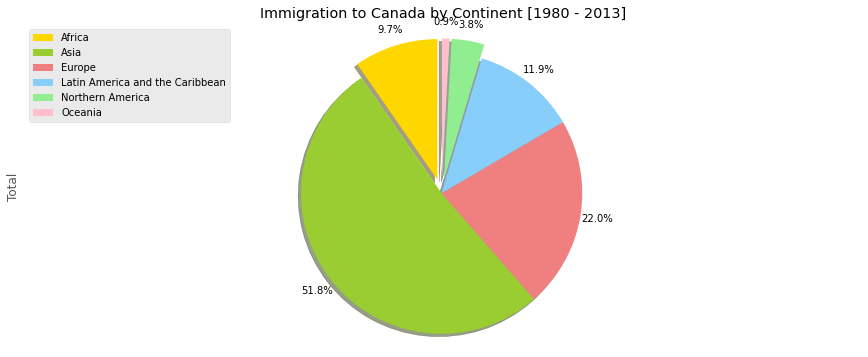

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]   


df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%', 
                           startangle=90,     
                           shadow=True,       
                           labels=None,        
                           pctdistance=1.12,    
                           colors=colors_list,   
                           explode=explode_list 
                           )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') 


plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box plots

In [20]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


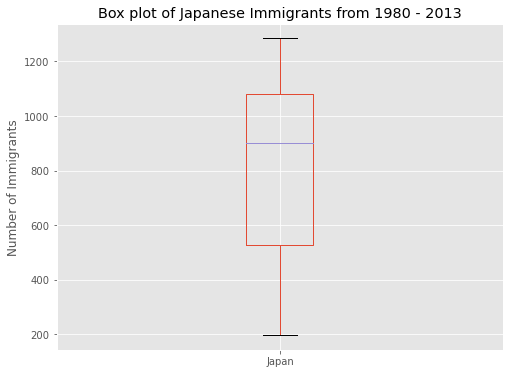

In [21]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [22]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [23]:
df_CI = df.loc[['China', 'India'], years].transpose()
df_CI.head(2)

Country,China,India
1980,5123,8880
1981,6682,8670


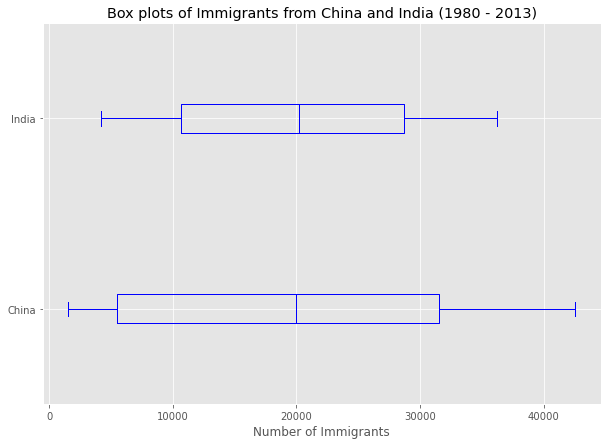

In [24]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# Subplots

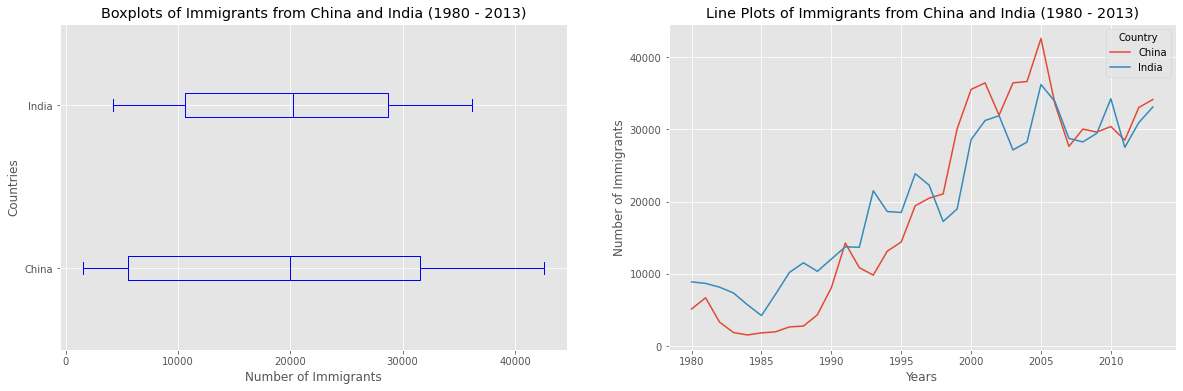

In [25]:
fig = plt.figure() 

ax0 = fig.add_subplot(1,2,1) 
ax1 = fig.add_subplot(1,2,2) 


df_CI.plot(kind='box', color='blue', vert=False, figsize=(20,6), ax=ax0) 
ax0.set_title('Boxplots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')


df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()